In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

B = np.load('beer_ratings.npy')
R = np.load('beer_rated.npy')
num_beers = np.size(B,0)
num_users = np.size(B,1)
print(num_beers,num_users)

#Or use this code to make matrix R(i,j) = 1 if User j rated beer i
#R=[]
#for i in range(0,num_beers):
   # row = []
   # beer_row = B[i]
   # for j in range(0,num_users):
   #     row.append(int(beer_row[j]>0))
   # R.append(row)
# R = np.array(R)

29637 5000


In [4]:
#mean normalization
num_ratings = np.sum(R,axis=1)
sum_ratings = np.sum(B,axis=1)
Mu = []
for i in range(0,num_beers):
    if num_ratings[i] == 0:
        Mu.append(0)
    else:
        Mu.append(sum_ratings[i]/num_ratings[i])
Bmu = np.subtract(B,np.matrix.transpose(np.array(num_users*[Mu])))

In [11]:
#Choose number of features
num_features = 10

#randomly initialize features for each beer
X_rand = []
for i in range(0,num_beers):
    row = []
    for j in range(0,num_features):
        row.append(np.random.random()/num_features)
    X_rand.append(row)
X = np.array(X_rand)
#randomly initialize feature-preference for each user
Theta_rand = []
for i in range(0,num_users):
    row = []
    for j in range(0,num_features):
        row.append(np.random.random()/num_features)
    Theta_rand.append(row)
Theta = np.array(Theta_rand)

In [12]:
lamb = 1
def Cost(X,Theta,Bmu,R,lamb):
    #Bmu is mean-normalized Beer-ratings
    #R(i,j)=1 if user j rated beer i
    m = len(X)
    n = len(Theta)
    Pred = np.matmul(X,np.matrix.transpose(Theta))
    Diff = np.subtract(Pred,Bmu)
    SqDiff = np.multiply(Diff,Diff)
    A = np.multiply(SqDiff,R)
    J = np.sum(A)
    Xsq = np.multiply(X,X)
    SumXsq = np.sum(Xsq)
    Thetasq = np.multiply(Theta,Theta)
    SumThetasq = np.sum(Thetasq)
    return ((1/2)*J+(lamb/2)*(SumXsq+SumThetasq))

In [13]:
alpha = .005
def GradDescent(X,Theta,Bmu,R, alpha, lamb):
    Xgrad = np.subtract((1-lamb*alpha)*X,alpha*np.matmul(np.multiply(R,(np.subtract(np.matmul(X,np.matrix.transpose(Theta)),Bmu))),Theta))
    Thetagrad = np.subtract((1-lamb*alpha)*Theta,alpha*np.matmul(np.matrix.transpose(np.multiply(R,np.subtract(np.matmul(X,np.matrix.transpose(Theta)),Bmu))),X))
    return (Xgrad,Thetagrad)

In [14]:
iterations = []
cost_values = []

In [ ]:
for i in range(0,130):
    if i % 10 == 0:
        J = Cost(X,Theta,Bmu,R,lamb)
        iterations.append(i)
        cost_values.append(J)
    (X,Theta) = GradDescent(X,Theta,Bmu,R,alpha,lamb)

In [ ]:
for i in range(131,251):
    if i % 10 == 0:
        J = Cost(X,Theta,Bmu,R,lamb)
        iterations.append(i)
        cost_values.append(J)
    (X,Theta) = GradDescent(X,Theta,Bmu,R,alpha,lamb)

<function matplotlib.pyplot.show(*args, **kw)>

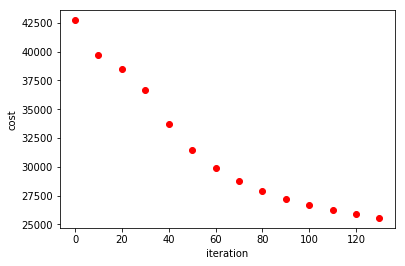

In [17]:
plt.plot(iterations,cost_values,'ro')
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show